In [6]:
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sea
import math as m
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction import text
import nltk as nlp

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA






import pandas as pd
from imblearn.over_sampling import ADASYN#
from imblearn.over_sampling import SMOTE#
from imblearn.over_sampling import KMeansSMOTE#
from imblearn.over_sampling import BorderlineSMOTE#
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler#
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek#
from imblearn.combine import SMOTEENN#

from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks


from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.tree import ExtraTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 


from imblearn.metrics import geometric_mean_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 


from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
import operator
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
import math as m
import math
import collections

In [ ]:
def Average(lst):
  return float(sum(lst) / len(lst)) 
kf = KFold(n_splits=5, random_state=None, shuffle=True)

In [ ]:
def round_up(n, decimals=0):
  multiplier = 10 ** decimals
  return math.ceil(n * multiplier) / multiplier

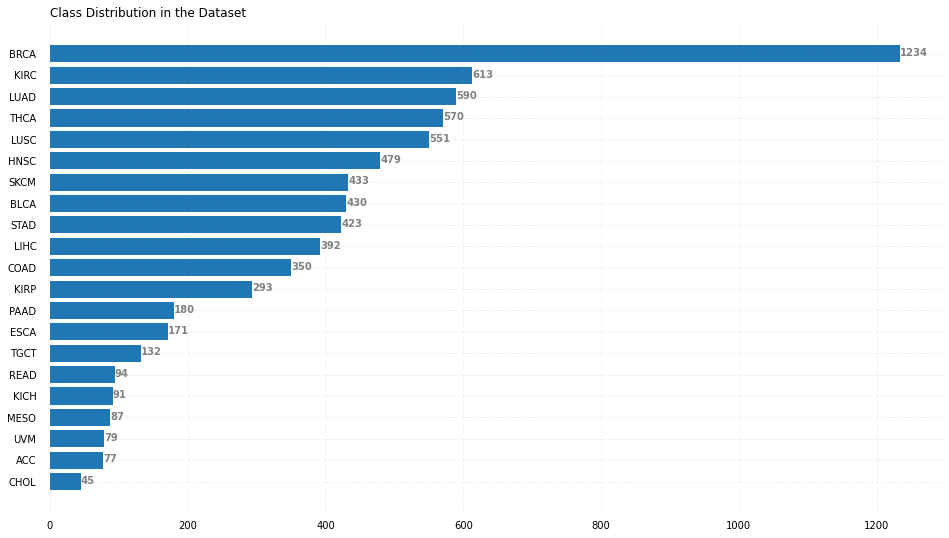

In [ ]:
#importing the datasets
rnaData = pd.read_csv("/content/pancan_scaled_zeroone_rnaseq.tsv", sep='\t')
rnaData.rename(columns={"Unnamed: 0": "sample_id"}, inplace=True)
clinicalData = pd.read_csv("/content/clinical_data.csv")
rnaData_columns = rnaData.columns
clinicalData_columns = clinicalData.columns
#merging clinical data and rnadata
combined = pd.merge(rnaData, clinicalData, on="sample_id")
#dropping the irrelevant columns
combined.drop(['sample_id', 'days_to_death', 'platform', 'analysis_center', 'gender',
       'race', 'ethnicity', 'organ', 'vital_status',
       'sample_type', 'age_at_diagnosis', 'percent_tumor_nuclei', 'drug',
       'year_of_diagnosis'],axis =1, inplace=True)
#dropping null values
combined.dropna(inplace=True)


#plotting the class distribution
class_dist=combined['acronym'].value_counts()
classes = np.array(class_dist.index)
class_count = np.array(class_dist.values)



fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(classes, class_count)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Class Distribution in the Dataset',
             loc ='left', )
 
# Show Plot
plt.show()


In [ ]:
labelencoder = LabelEncoder()
X=np.array(combined.iloc[:,1:-3])
y=labelencoder.fit_transform(np.array(combined.iloc[:,-3]))
y_stage = labelencoder.fit_transform(np.array(combined.iloc[:,-1]))


scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA()
pca.fit_transform(X)
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1

print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')
pca = PCA(n_components=k)
pca.fit(X)
X = pca.transform(X)

dct = collections.Counter(y)
key=dct.keys()



mode='kkkk'
mode = 'ADASYN'
cnt=0
#kf = KFold(n_splits=2 random_state=None, shuffle=True)

kf = KFold(n_splits=2, random_state=None, shuffle=True)
kf = StratifiedKFold(n_splits=4)
#warnings.filterwarnings('ignore')
f_sns = []
f_pre = []
f_f1 = []
f_spc = []
f_gmn =[]


model_list = ['DTC','MLP','SVM','LRC','KNN','BNB','LDA','SGDC','PAC','ETC','AdaBoost','Bagging','GradientBoosting','RandomForest','DMLP']

resampling_list = ['ADASYN','KMeansSMOTE','SMOTE','BorderlineSMOTE-1','BorderlineSMOTE-2','SVMSMOTE','RandomOversampler','SMOTETomek','SMOTEENN']

classifier = DecisionTreeClassifier()
ln=[]

for model in model_list:
  if model == 'DTC':
    classifier = DecisionTreeClassifier()
  elif model == 'MLP':
    classifier = MLPClassifier()
  elif model == 'SVM':
    classifier = LinearSVC()
  elif model == 'LRC':
    classifier = LogisticRegression()
  elif model == 'KNN':
    classifier = KNeighborsClassifier()
  elif model == 'BNB':
    classifier = BernoulliNB()
  elif model == 'LDA':
    classifier = LinearDiscriminantAnalysis()
  elif model == 'SGDC':
    classifier = SGDClassifier()
  elif model == 'PAC':
    classifier = PassiveAggressiveClassifier()
  elif model == 'ETC':
    classifier = ExtraTreeClassifier()
  elif model == 'AdaBoost':
    classifier = AdaBoostClassifier()
  elif model == 'Bagging':
    classifier = BaggingClassifier()
  elif model == 'GradientBoosting':
    classifier = GradientBoostingClassifier()
  elif model == 'RandomForest':
    classifier = RandomForestClassifier()
  elif model == 'DMLP':
    classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=200)
  print("Model: ",model)


  for resampler in resampling_list:
    f_sns = []
    f_pre = []
    f_f1 = []
    f_spc = []
    f_gmn =[]
    ln=[]
    print("Resampling Strategy: ",resampler)
    cnt=0
    for train_index, test_index in kf.split(X,y):
        sns = []
        pre = []
        f1 = []
        spc = []
        gmn =[]
        cnt+=1
        print('Fold: ',cnt)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        elements_count = collections.Counter(y_train)
        print("Class Distribution of Training Data: ", elements_count)
        all_classes = elements_count.keys()
        # printing the element and the frequency
        #dct = collections.Counter(y)
        majority_class=max(elements_count.items(), key=operator.itemgetter(1))[0]
        majority_count=elements_count[majority_class]
        strategy = {}
        ml_model = []
        resample_tech = []
        for ratio in np.arange(0, 1.1, 0.1):
          strategy = {}
          #ml_model.append(model)
          #resample_tech.append(resampler)
          #print("Rat",ratio)
          if ratio != 0:
            for class_label in all_classes:
              if class_label != majority_class:
                count_current = elements_count[class_label]
                maj_min_diff = majority_count - count_current
                syntheticData_amount=(float(ratio*100)/100)*maj_min_diff
                syntheticData_amount=int(m.ceil(syntheticData_amount))
                strategy[class_label] = syntheticData_amount + elements_count[class_label]
              else:
                strategy[class_label] = majority_count

            #classifier = DecisionTreeClassifier()

            print("strategy: ",strategy)

            if resampler == 'ADASYN':
              sm=ADASYN(n_neighbors=17,sampling_strategy=strategy)
              #sm=ADASYN(sampling_strategy=strategy)
            elif resampler == 'SMOTE':
              sm=SMOTE(sampling_strategy=strategy)
            elif resampler == 'KMeansSMOTE':
              #sm=KMeansSMOTE(sampling_strategy=strategy,kmeans_estimator=21)
              sm=KMeansSMOTE(sampling_strategy=strategy)
            elif resampler == 'BorderlineSMOTE-1':
              sm=BorderlineSMOTE(sampling_strategy=strategy,kind="borderline-1")
            elif resampler == 'BorderlineSMOTE-2':
              sm=BorderlineSMOTE(sampling_strategy=strategy,kind="borderline-1")
            elif resampler == 'SVMSMOTE':
              sm=SVMSMOTE(sampling_strategy=strategy)
            elif resampler == 'RandomOversampler':
              sm=RandomOverSampler(sampling_strategy=strategy)
            elif resampler == 'SMOTENC':
              sm=SMOTENC(sampling_strategy=strategy)
            elif resampler == 'SMOTETomek':
              sm=SMOTETomek(sampling_strategy=strategy)
            elif resampler == 'SMOTEENN':
              sm=SMOTEENN(sampling_strategy=strategy)




            print(y_train)
            try:
              x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
              print()
              #print("Class Distribution of Training Data after Oversampling at Ratio",ratio," : ", collections.Counter(y_train_res))
              classifier.fit(x_train_res,y_train_res)
              y_pred = classifier.predict(X_test)
              sns.append(sensitivity_score(y_test, y_pred, average='weighted'))
              spc.append(specificity_score(y_test, y_pred, average='weighted'))
              pre.append(precision_score(y_test, y_pred, average='weighted'))
              f1.append(f1_score(y_test, y_pred, average='weighted'))
              gmn.append(geometric_mean_score(y_test, y_pred, average='weighted'))
            except:
              continue
          else:
            #classifier = DecisionTreeClassifier()
            classifier.fit(X_train,y_train)
            y_pred = classifier.predict(X_test)
            sns.append(sensitivity_score(y_test, y_pred, average='weighted'))
            spc.append(specificity_score(y_test, y_pred, average='weighted'))
            pre.append(precision_score(y_test, y_pred, average='weighted'))
            f1.append(f1_score(y_test, y_pred, average='weighted'))
            gmn.append(geometric_mean_score(y_test, y_pred, average='weighted'))

        #incr = ratio+0.1
        #print('incr: ',incr)
        #ratio = round_up(incr,2)
        #break
        f_sns.append(sns)
        f_pre.append(pre)
        f_f1.append(f1)
        f_spc.append(spc)
        f_gmn.append(gmn)


    print(np.mean(f_sns, axis = 0))
    print(np.mean(f_pre, axis = 0))
    print(np.mean(f_f1, axis = 0))
    print(np.mean(f_spc, axis = 0))
    print(np.mean(f_gmn, axis = 0))
    f_OQ = ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
    ml_model = [model,model,model,model,model,model,model,model,model,model,model]
    resample_tech = [resampler,resampler,resampler,resampler,resampler,resampler,resampler,resampler,resampler,resampler,resampler]
    ml_model_df=pd.DataFrame(ml_model,columns=['Model'])
    resample_tech_df=pd.DataFrame(resample_tech,columns=['Resampling'])
    f_OQ_df=pd.DataFrame(f_OQ,columns=['Oversampling Quantity'])
    f_sns_df=pd.DataFrame(np.mean(f_sns, axis = 0),columns=['SNS'])
    f_pre_df=pd.DataFrame(np.mean(f_pre, axis = 0),columns=['PRE'])
    f_f1_df=pd.DataFrame(np.mean(f_f1, axis = 0),columns=['F1'])
    f_spc_df=pd.DataFrame(np.mean(f_spc, axis = 0),columns=['SPC'])
    f_gmn_df=pd.DataFrame(np.mean(f_gmn, axis = 0),columns=['GMN'])
    DTC_SMOTE_Res=pd.concat([ml_model_df,resample_tech_df,f_OQ_df,f_sns_df,f_pre_df,f_f1_df,f_spc_df,f_gmn_df],axis = 1)
    print(DTC_SMOTE_Res)
    if model == 'DTC' and resampler == 'ADASYN':
      df_res = DTC_SMOTE_Res
    else:
      df_res = pd.concat([df_res,DTC_SMOTE_Res],axis=0)
    


In [ ]:
df_res

In [ ]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks

In [ ]:
#Undersampling

kf = StratifiedKFold(n_splits=4)

labelencoder = LabelEncoder()
X=np.array(combined.iloc[:,1:-3])
y=labelencoder.fit_transform(np.array(combined.iloc[:,-3]))
y_stage = labelencoder.fit_transform(np.array(combined.iloc[:,-1]))


scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA()
pca.fit_transform(X)
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1

print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')
pca = PCA(n_components=k)
pca.fit(X)
X = pca.transform(X)

dct = collections.Counter(y)
key=dct.keys()

#warnings.filterwarnings('ignore')
f_sns = []
f_pre = []
f_f1 = []
f_spc = []
f_gmn =[]


#model_list = ['DTC','MLP','SVM','LRC','KNN','BNB','LDA','SGDC','PAC','ETC','AdaBoost','Bagging','GradientBoosting','RandomForest','DMLP']

model_list = ['DTC','MLP','SVM','LRC','KNN','BNB','LDA','SGDC','PAC','ETC','AdaBoost','Bagging','RandomForest','DMLP']
resampling_list = ['ClusterCentroids','CondensedNearestNeighbour','RandomUnderSampler','NeighbourhoodCleaningRule','EditedNearestNeighbours','AllKNN','RepeatedEditedNearestNeighbours','InstanceHardnessThreshold','NearMiss','OneSidedSelection','TomekLinks']

classifier = DecisionTreeClassifier()
ln=[]

for model in model_list:
  if model == 'DTC':
    classifier = DecisionTreeClassifier()
  elif model == 'MLP':
    classifier = MLPClassifier()
  elif model == 'SVM':
    classifier = LinearSVC()
  elif model == 'LRC':
    classifier = LogisticRegression()
  elif model == 'KNN':
    classifier = KNeighborsClassifier()
  elif model == 'BNB':
    classifier = BernoulliNB()
  elif model == 'LDA':
    classifier = LinearDiscriminantAnalysis()
  elif model == 'SGDC':
    classifier = SGDClassifier()
  elif model == 'PAC':
    classifier = PassiveAggressiveClassifier()
  elif model == 'ETC':
    classifier = ExtraTreeClassifier()
  elif model == 'AdaBoost':
    classifier = AdaBoostClassifier()
  elif model == 'Bagging':
    classifier = BaggingClassifier()
  elif model == 'GradientBoosting':
    classifier = GradientBoostingClassifier()
  elif model == 'RandomForest':
    classifier = RandomForestClassifier()
  elif model == 'DMLP':
    classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=200)
  print("Model: ",model)


  for resampler in resampling_list:
    f_sns = []
    f_pre = []
    f_f1 = []
    f_spc = []
    f_gmn =[]
    ln=[]
    print("Resampling Strategy: ",resampler)
    cnt=0
    for train_index, test_index in kf.split(X,y):
        sns = []
        pre = []
        f1 = []
        spc = []
        gmn =[]
        cnt+=1
        print('Fold: ',cnt)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        elements_count = collections.Counter(y_train)
        print("Class Distribution of Training Data: ", elements_count)
        all_classes = elements_count.keys()
        # printing the element and the frequency
        #dct = collections.Counter(y)
        majority_class=max(elements_count.items(), key=operator.itemgetter(1))[0]
        majority_count=elements_count[majority_class]
        strategy = {}
        ml_model = []
        resample_tech = []
        #for ratio in np.arange(0, 1.1, 0.1):
        strategy = {}
        #ml_model.append(model)
        #resample_tech.append(resampler)
        #print("Rat",ratio)
        #if ratio != 0:

        if resampler == 'ClusterCentroids':
          sm=ClusterCentroids()
          #sm=ADASYN(sampling_strategy=strategy)
        elif resampler == 'CondensedNearestNeighbour':
          sm=CondensedNearestNeighbour()
        elif resampler == 'RandomUnderSampler':
          #sm=KMeansSMOTE(sampling_strategy=strategy,kmeans_estimator=21)
          sm=RandomUnderSampler()
        elif resampler == 'NeighbourhoodCleaningRule':
          sm=NeighbourhoodCleaningRule()
        elif resampler == 'EditedNearestNeighbours':
          sm=EditedNearestNeighbours()
        elif resampler == 'AllKNN':
          sm=AllKNN()
        elif resampler == 'RepeatedEditedNearestNeighbours':
          sm=RepeatedEditedNearestNeighbours()
        elif resampler == 'InstanceHardnessThreshold':
          sm=InstanceHardnessThreshold()
        elif resampler == 'NearMiss':
          sm=NearMiss()
        elif resampler == 'OneSidedSelection':
          sm=OneSidedSelection()
        elif resampler == 'TomekLinks':
          sm=TomekLinks()




        print(y_train)
        try:
          x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
          print()
          #print("Class Distribution of Training Data after Oversampling at Ratio",ratio," : ", collections.Counter(y_train_res))
          classifier.fit(x_train_res,y_train_res)
          y_pred = classifier.predict(X_test)
          sns.append(sensitivity_score(y_test, y_pred, average='weighted'))
          spc.append(specificity_score(y_test, y_pred, average='weighted'))
          pre.append(precision_score(y_test, y_pred, average='weighted'))
          f1.append(f1_score(y_test, y_pred, average='weighted'))
          gmn.append(geometric_mean_score(y_test, y_pred, average='weighted'))
        except:
          continue

        #incr = ratio+0.1
        #print('incr: ',incr)
        #ratio = round_up(incr,2)
        #break
        f_sns.append(sns)
        f_pre.append(pre)
        f_f1.append(f1)
        f_spc.append(spc)
        f_gmn.append(gmn)


    print(np.mean(f_sns, axis = 0))
    print(np.mean(f_pre, axis = 0))
    print(np.mean(f_f1, axis = 0))
    print(np.mean(f_spc, axis = 0))
    print(np.mean(f_gmn, axis = 0))
    #f_OQ = ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
    ml_model = [model]
    resample_tech = [resampler]
    ml_model_df=pd.DataFrame(ml_model,columns=['Model'])
    resample_tech_df=pd.DataFrame(resample_tech,columns=['Resampling'])
    #f_OQ_df=pd.DataFrame(f_OQ,columns=['Oversampling Quantity'])
    f_sns_df=pd.DataFrame(np.mean(f_sns, axis = 0),columns=['SNS'])
    f_pre_df=pd.DataFrame(np.mean(f_pre, axis = 0),columns=['PRE'])
    f_f1_df=pd.DataFrame(np.mean(f_f1, axis = 0),columns=['F1'])
    f_spc_df=pd.DataFrame(np.mean(f_spc, axis = 0),columns=['SPC'])
    f_gmn_df=pd.DataFrame(np.mean(f_gmn, axis = 0),columns=['GMN'])
    DTC_SMOTE_Res=pd.concat([ml_model_df,resample_tech_df,f_sns_df,f_pre_df,f_f1_df,f_spc_df,f_gmn_df],axis = 1)
    print(DTC_SMOTE_Res)
    if model == 'DTC' and resampler == 'ClusterCentroids':
      df_res = DTC_SMOTE_Res
    else:
      df_res = pd.concat([df_res,DTC_SMOTE_Res],axis=0)

834 features explain around 90% of the variance. From 7129 features to 834, not too bad.
Model:  DTC
Resampling Strategy:  ClusterCentroids
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413,

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.53022519]
[0.54189609]
[0.50294936]
[0.9707067]
[0.7169418]
  Model         Resampling       SNS       PRE        F1       SPC       GMN
0   DTC  OneSidedSelection  0.530225  0.541896  0.502949  0.970707  0.716942
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ...

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.91851505]
[0.91821603]
[0.91125554]
[0.99467783]
[0.95582499]
  Model               Resampling       SNS       PRE        F1       SPC  \
0   MLP  EditedNearestNeighbours  0.918515  0.918216  0.911256  0.994678   

        GMN  
0  0.955825  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.63166093]
[0.66401071]
[0.6107481]
[0.97647649]
[0.78473497]
  Model         Resampling       SNS       PRE        F1       SPC       GMN
0   MLP  OneSidedSelection  0.631661  0.664011  0.610748  0.976476  0.784735
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ..

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.92576102]
[0.9359733]
[0.92815645]
[0.9965322]
[0.96048205]
  Model        Resampling       SNS       PRE        F1       SPC       GMN
0   SVM  ClusterCentroids  0.925761  0.935973  0.928156  0.996532  0.960482
Resampling Strategy:  CondensedNearestNeighbour
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.90169406]
[0.9230002]
[0.90727497]
[0.99604753]
[0.9476907]
  Model          Resampling       SNS    PRE        F1       SPC       GMN
0   SVM  RandomUnderSampler  0.901694  0.923  0.907275  0.996048  0.947691
Resampling Strategy:  NeighbourhoodCleaningRule
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.92056461]
[0.91496617]
[0.91128096]
[0.99554186]
[0.95730358]
  Model                 Resampling       SNS       PRE        F1       SPC  \
0   SVM  NeighbourhoodCleaningRule  0.920565  0.914966  0.911281  0.995542   

        GMN  
0  0.957304  
Resampling Strategy:  EditedNearestNeighbours
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.90497911]
[0.8921036]
[0.88875161]
[0.99424019]
[0.94854715]
  Model               Resampling       SNS       PRE        F1      SPC  \
0   SVM  EditedNearestNeighbours  0.904979  0.892104  0.888752  0.99424   

        GMN  
0  0.948547  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.92958974]
[0.92603483]
[0.92578629]
[0.99596343]
[0.96218904]
  Model Resampling      SNS       PRE        F1       SPC       GMN
0   SVM     AllKNN  0.92959  0.926035  0.925786  0.995963  0.962189
Resampling Strategy:  RepeatedEditedNearestNeighbours
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.90415884]
[0.89450006]
[0.88783673]
[0.99416388]
[0.94807951]
  Model                       Resampling       SNS     PRE        F1  \
0   SVM  RepeatedEditedNearestNeighbours  0.904159  0.8945  0.887837   

        SPC      GMN  
0  0.994164  0.94808  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.86615058]
[0.91496183]
[0.87800079]
[0.99544825]
[0.92850329]
  Model                 Resampling       SNS       PRE        F1       SPC  \
0   SVM  InstanceHardnessThreshold  0.866151  0.914962  0.878001  0.995448   

        GMN  
0  0.928503  
Resampling Strategy:  NearMiss
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.83975644]
[0.90036654]
[0.85310754]
[0.99462571]
[0.91383307]
  Model Resampling       SNS       PRE        F1       SPC       GMN
0   SVM   NearMiss  0.839756  0.900367  0.853108  0.994626  0.913833
Resampling Strategy:  OneSidedSelection
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.8487883]
[0.86875738]
[0.83480265]
[0.99208]
[0.91737447]
  Model         Resampling       SNS       PRE        F1      SPC       GMN
0   SVM  OneSidedSelection  0.848788  0.868757  0.834803  0.99208  0.917374
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.93683593]
[0.93977395]
[0.9369513]
[0.99648106]
[0.9661809]
  Model  Resampling       SNS       PRE        F1       SPC       GMN
0   SVM  TomekLinks  0.936836  0.939774  0.936951  0.996481  0.966181
Model:  LRC
Resampling Strategy:  ClusterCentroids
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.93013477]
[0.9379325]
[0.93161573]
[0.99653009]
[0.96275072]
  Model        Resampling       SNS       PRE        F1      SPC       GMN
0   LRC  ClusterCentroids  0.930135  0.937933  0.931616  0.99653  0.962751
Resampling Strategy:  CondensedNearestNeighbour
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.8599937]
[0.8841119]
[0.8627391]
[0.99340748]
[0.92422715]
  Model                 Resampling       SNS       PRE        F1       SPC  \
0   LRC  CondensedNearestNeighbour  0.859994  0.884112  0.862739  0.993407   

        GMN  
0  0.924227  
Resampling Strategy:  RandomUnderSampler
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.90456815]
[0.92321986]
[0.90885576]
[0.99583951]
[0.94908043]
  Model          Resampling       SNS      PRE        F1      SPC      GMN
0   LRC  RandomUnderSampler  0.904568  0.92322  0.908856  0.99584  0.94908
Resampling Strategy:  NeighbourhoodCleaningRule
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.93437527]
[0.93274973]
[0.92976733]
[0.99628216]
[0.96481523]
  Model                 Resampling       SNS      PRE        F1       SPC  \
0   LRC  NeighbourhoodCleaningRule  0.934375  0.93275  0.929767  0.996282   

        GMN  
0  0.964815  
Resampling Strategy:  EditedNearestNeighbours
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.92726502]
[0.92515331]
[0.92005902]
[0.9956087]
[0.96081921]
  Model               Resampling       SNS       PRE        F1       SPC  \
0   LRC  EditedNearestNeighbours  0.927265  0.925153  0.920059  0.995609   

        GMN  
0  0.960819  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.93833941]
[0.93934643]
[0.93572867]
[0.99657007]
[0.96700745]
  Model Resampling       SNS       PRE        F1      SPC       GMN
0   LRC     AllKNN  0.938339  0.939346  0.935729  0.99657  0.967007
Resampling Strategy:  RepeatedEditedNearestNeighbours
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.92726502]
[0.92515331]
[0.92005902]
[0.9956087]
[0.96081921]
  Model                       Resampling       SNS       PRE        F1  \
0   LRC  RepeatedEditedNearestNeighbours  0.927265  0.925153  0.920059   

        SPC       GMN  
0  0.995609  0.960819  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.86642276]
[0.90026111]
[0.8726981]
[0.9941821]
[0.92809131]
  Model                 Resampling       SNS       PRE        F1       SPC  \
0   LRC  InstanceHardnessThreshold  0.866423  0.900261  0.872698  0.994182   

        GMN  
0  0.928091  
Resampling Strategy:  NearMiss
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.83729615]
[0.89493907]
[0.84644254]
[0.99392596]
[0.91220463]
  Model Resampling       SNS       PRE        F1       SPC       GMN
0   LRC   NearMiss  0.837296  0.894939  0.846443  0.993926  0.912205
Resampling Strategy:  OneSidedSelection
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.86437852]
[0.87981666]
[0.85401612]
[0.99241435]
[0.92599249]
  Model         Resampling       SNS       PRE        F1       SPC       GMN
0   LRC  OneSidedSelection  0.864379  0.879817  0.854016  0.992414  0.925992
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.94476533]
[0.94636772]
[0.94416191]
[0.99698477]
[0.97051722]
  Model  Resampling       SNS       PRE        F1       SPC       GMN
0   LRC  TomekLinks  0.944765  0.946368  0.944162  0.996985  0.970517
Model:  KNN
Resampling Strategy:  ClusterCentroids
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[0.70577512]
[0.75891887]
[0.70309752]
[0.98346629]
[0.8328211]
  Model                 Resampling       SNS       PRE        F1       SPC  \
0   KNN  CondensedNearestNeighbour  0.705775  0.758919  0.703098  0.983466   

        GMN  
0  0.832821  
Resampling Strategy:  RandomUnderSampler
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.85083629]
[0.88377821]
[0.85826146]
[0.99383038]
[0.91954327]
  Model          Resampling       SNS       PRE        F1      SPC       GMN
0   KNN  RandomUnderSampler  0.850836  0.883778  0.858261  0.99383  0.919543
Resampling Strategy

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.9060717]
[0.90396241]
[0.90021048]
[0.99416854]
[0.94908758]
  Model                 Resampling       SNS       PRE       F1       SPC  \
0   KNN  NeighbourhoodCleaningRule  0.906072  0.903962  0.90021  0.994169   

        GMN  
0  0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.90074159]
[0.89680348]
[0.89219261]
[0.99342704]
[0.94592641]
  Model               Resampling       SNS       PRE        F1       SPC  \
0   KNN  EditedNearestNeighbours  0.900742  0.896803  0.892193  0.993427   

        GMN  
0  0.945926  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.90074159]
[0.89680348]
[0.89219261]
[0.99342704]
[0.94592641]
  Model                       Resampling       SNS       PRE        F1  \
0   KNN  RepeatedEditedNearestNeighbours  0.900742  0.896803  0.892193   

        SPC       GMN  
0  0.993427  0.945926  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99,

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.68869631]
[0.72698534]
[0.65750348]
[0.97982333]
[0.82025141]
  Model         Resampling       SNS       PRE        F1       SPC       GMN
0   KNN  OneSidedSelection  0.688696  0.726985  0.657503  0.979823  0.820251
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 .

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.13413176]
[0.47236509]
[0.11529157]
[0.95213896]
[0.35549304]
  Model                 Resampling       SNS       PRE        F1       SPC  \
0   BNB  CondensedNearestNeighbour  0.134132  0.472365  0.115292  0.952139   

        GMN  
0  0.355493  
Resampling Strategy:  RandomUnderSampler
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




[0.85138236]
[0.85400499]
[0.84028778]
[0.98410362]
[0.91532666]
  Model               Resampling       SNS       PRE        F1       SPC  \
0   BNB  EditedNearestNeighbours  0.851382  0.854005  0.840288  0.984104   

        GMN  
0  0.915327  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[0.85138236]
[0.85400499]
[0.84028778]
[0.98410362]
[0.91532666]
  Model                       Resampling       SNS       PRE        F1  \
0   BNB  RepeatedEditedNearestNeighbours  0.851382  0.854005  0.840288   

        SPC       GMN  
0  0.984104  0.915327  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[0.39473657]
[0.62560148]
[0.34336421]
[0.94722106]
[0.60899262]
  Model         Resampling       SNS       PRE        F1       SPC       GMN
0   BNB  OneSidedSelection  0.394737  0.625601  0.343364  0.947221  0.608993
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.87954693]
[0.8851072]
[0.87794554]
[0.99007861]
[0.93317391]
  Model  Resampling       SNS       PRE        F1       SPC       GMN
0   BNB  TomekLinks  0.879547  0.885107  0.877946  0.990079  0.933174
Model:  LDA
Resampling Strategy: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[0.09803376]
[0.21406189]
[0.06902392]
[0.95090479]
[0.30279108]
  Model                 Resampling       SNS       PRE        F1       SPC  \
0   LDA  CondensedNearestNeighbour  0.098034  0.214062  0.069024  0.950905   

        GMN  
0  0.302791  
Resampling Strategy:  RandomUnderSampler
Fold:  1
Class Distribution of Training Data: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.58271588]
[0.61656627]
[0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.76787261]
[0.79338546]
[0.76960588]
[0.98661589]
[0.86216125]
  Model         Resampling       SNS       PRE        F1       SPC       GMN
0   LDA  OneSidedSelection  0.767873  0.793385  0.769606  0.986616  0.862161
Resampling Strategy

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.92548742]
[0.92499951]
[0.92003316]
[0.99481851]
[0.95951531]
  Model                 Resampling       SNS    PRE        F1       SPC  \
0  SGDC  NeighbourhoodCleaningRule  0.925487  0.925  0.920033  0.994819   

        GMN  
0  0.959

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.92111277]
[0.91446406]
[0.91255673]
[0.99381078]
[0.95676049]
  Model               Resampling       SNS       PRE        F1       SPC  \
0  SGDC  EditedNearestNeighbours  0.921113  0.914464  0.912557  0.993811   

       GMN  
0  0.95676  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.91441213]
[0.910087]
[0.90675244]
[0.99377698]
[0.95325301]
  Model                       Resampling       SNS       PRE        F1  \
0  SGDC  RepeatedEditedNearestNeighbours  0.914412  0.910087  0.906752   

        SPC       GMN  
0  0.993777  0.953253  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.83894551]
[0.85208364]
[0.82600365]
[0.99098202]
[0.91145787]
  Model         Resampling       SNS       PRE        F1       SPC       GMN
0  SGDC  OneSidedSelection  0.838946  0.852084  0.826004  0.990982  0.911458
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 .

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.92466715]
[0.9227348]
[0.91771724]
[0.99557721]
[0.95945678]
  Model               Resampling       SNS       PRE        F1       SPC  \
0   PAC  EditedNearestNeighbours  0.924667  0.922735  0.917717  0.995577   

        GMN  
0  0.95

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.92685519]
[0.92345104]
[0.9195193]
[0.99569995]
[0.96064955]
  Model                       Resampling       SNS       PRE        F1  \
0   PAC  RepeatedEditedNearestNeighbours  0.926855  0.923451  0.919519   

      SPC      GMN  
0  0.9957  0.96065  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[0.49754218]
[0.49111191]
[0.4901984]
[0.95816474]
[0.6896281]
  Model                       Resampling       SNS       PRE        F1  \
0   ETC  RepeatedEditedNearestNeighbours  0.497542  0.491112  0.490198   

        SPC       GMN  
0  0.958165  0.689628  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.45187514]
[0.4544671]
[0.45116103]
[0.95673387]
[0.6571514]
  Model  Resampling       SNS       PRE        F1       SPC       GMN
0   ETC  TomekLinks  0.451875  0.454467  0.451161  0.956734  0.657151
Model:  AdaBoost
Resampling Strate

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.09626431]
[0.02574953]
[0.03201911]
[0.9207554]
[0.28433543]
      Model        Resampling       SNS      PRE        F1       SPC       GMN
0  AdaBoost  ClusterCentroids  0.096264  0.02575  0.032019  0.920755  0.284335
Resampling Strategy:  CondensedNearestNeighbour
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.07506224]
[0.05599712]
[0.05753367]
[0.99078839]
[0.27201953]
      Model                 Resampling       SNS       PRE        F1  \
0  AdaBoost  CondensedNearestNeighbour  0.075062  0.055997  0.057534   

        SPC      GMN  
0  0.990788  0.27202  
Resampling Strategy:  RandomUnderSampler
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.1061056]
[0.03853856]
[0.03602241]
[0.91547537]
[0.30274558]
      Model          Resampling       SNS       PRE        F1       SPC  \
0  AdaBoost  RandomUnderSampler  0.106106  0.038539  0.036022  0.915475   

        GMN  
0  0.302746  
Resampling Strategy:  NeighbourhoodCleaningRule
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.2296929]
[0.21350464]
[0.182834]
[0.93526613]
[0.46300801]
      Model                 Resampling       SNS       PRE        F1  \
0  AdaBoost  NeighbourhoodCleaningRule  0.229693  0.213505  0.182834   

        SPC       GMN  
0  0.935266  0.463008  
Resampling Strategy:  EditedNearestNeighbours
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.22983377]
[0.18632128]
[0.17671292]
[0.93442693]
[0.46335887]
      Model               Resampling       SNS       PRE        F1       SPC  \
0  AdaBoost  EditedNearestNeighbours  0.229834  0.186321  0.176713  0.934427   

        GMN  
0  0.463359  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.22217498]
[0.18678082]
[0.17222977]
[0.93319595]
[0.45526529]
      Model Resampling       SNS       PRE       F1       SPC       GMN
0  AdaBoost     AllKNN  0.222175  0.186781  0.17223  0.933196  0.455265
Resampling Strategy:  RepeatedEditedNearestNeighbours
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.22887644]
[0.18632128]
[0.17546736]
[0.93433948]
[0.4623819]
      Model                       Resampling       SNS       PRE        F1  \
0  AdaBoost  RepeatedEditedNearestNeighbours  0.228876  0.186321  0.175467   

        SPC       GMN  
0  0.934339  0.462382  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.07902832]
[0.04218655]
[0.04163544]
[0.95812253]
[0.27244404]
      Model                 Resampling       SNS       PRE        F1  \
0  AdaBoost  InstanceHardnessThreshold  0.079028  0.042187  0.041635   

        SPC       GMN  
0  0.958123  0.272444  
Resampling Strategy:  NearMiss
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.04033327]
[0.01888087]
[0.02141857]
[0.98920672]
[0.19862316]
      Model Resampling       SNS       PRE        F1       SPC       GMN
0  AdaBoost   NearMiss  0.040333  0.018881  0.021419  0.989207  0.198623
Resampling Strategy:  OneSidedSelection
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.16927154]
[0.11022754]
[0.08692675]
[0.9083712]
[0.38964651]
      Model         Resampling       SNS       PRE        F1       SPC  \
0  AdaBoost  OneSidedSelection  0.169272  0.110228  0.086927  0.908371   

        GMN  
0  0.389647  
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.23270158]
[0.20250304]
[0.18179761]
[0.9297898]
[0.46487452]
      Model  Resampling       SNS       PRE        F1      SPC       GMN
0  AdaBoost  TomekLinks  0.232702  0.202503  0.181798  0.92979  0.464875
Model:  Bagging
Resampling Strategy:  ClusterCentroids
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33}

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.23203026]
[0.28985474]
[0.21526753]
[0.95595359]
[0.46802447]
     Model                 Resampling      SNS       PRE        F1       SPC  \
0  Bagging  CondensedNearestNeighbour  0.23203  0.289855  0.215268  0.955954   

        GMN  
0  0.468024  
Resampling Strategy:  RandomUnderSampler
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69,

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.88091521]
[0.87374764]
[0.87355893]
[0.99223173]
[0.93490971]
     Model                 Resampling       SNS       PRE        F1       SPC  \
0  Bagging  NeighbourhoodCleaningRule  0.880915  0.873748  0.873559  0.992232   

       GMN  
0  0.93491  
Resampling Strategy:  EditedNearestNeighbours
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.87339632]
[0.86635214]
[0.86271465]
[0.99112113]
[0.93038232]
     Model               Resampling       SNS       PRE        F1       SPC  \
0  Bagging  EditedNearestNeighbours  0.873396  0.866352  0.862715  0.991121   

        GMN  
0  0.930382  
Resampling Strategy:  AllKNN
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.88201035]
[0.8771105]
[0.87507288]
[0.99199341]
[0.93536566]
     Model Resampling      SNS       PRE        F1       SPC       GMN
0  Bagging     AllKNN  0.88201  0.877111  0.875073  0.991993  0.935366
Resampling Strategy:  RepeatedEd

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.86997766]
[0.86094629]
[0.85890261]
[0.99084625]
[0.92843642]
     Model                       Resampling       SNS       PRE        F1  \
0  Bagging  RepeatedEditedNearestNeighbours  0.869978  0.860946  0.858903   

        SPC       GMN  
0  0.990846  0.928436  
Resampling Strategy:  InstanceHardnessThreshold
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.62907966]
[0.63818039]
[0.57818862]
[0.97531014]
[0.78200652]
     Model         Resampling      SNS      PRE        F1      SPC       GMN
0  Bagging  OneSidedSelection  0.62908  0.63818  0.578189  0.97531  0.782007
Resampling Strategy:  TomekLinks
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 66, 20: 59, 0: 58, 3: 34})
[18 18 18 ... 10  3  3]

Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 .

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]

[0.39377222]
[0.49750045]
[0.39889803]
[0.97045974]
[0.6169775]
              Model                 Resampling       SNS     PRE        F1  \
0  GradientBoosting  CondensedNearestNeighbour  0.393772  0.4975  0.398898   

       SPC       GMN  
0  0.97046  0.616977  
Resampling Strategy:  RandomUnderSampler
Fold:  1
Class Distribution of Training Data:  Counter({2: 925, 8: 460, 11: 442, 19: 427, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold:  2
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 442, 19: 427, 12: 414, 6: 360, 16: 324, 1: 322, 17: 318, 10: 294, 4: 262, 9: 220, 14: 135, 5: 128, 18: 99, 15: 70, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 10  3  3]

Fold:  3
Class Distribution of Training Data:  Counter({2: 926, 8: 460, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 322, 17: 317, 10: 294, 4: 263, 9: 219, 14: 135, 5: 129, 18: 99, 15: 70, 7: 69, 13: 65, 20: 60, 0: 57, 3: 33})
[11 11 11 ... 10  3  3]

Fold:  4
Class Distribution of Training Data:  Counter({2: 925, 8: 459, 11: 443, 19: 428, 12: 413, 6: 359, 16: 325, 1: 323, 17: 317, 10: 294, 4: 263, 9: 220, 14: 135, 5: 128, 18: 99, 15: 71, 7: 68, 13: 65, 20: 59, 0: 58, 3: 34})
[11 11 11 ... 18 18 18]



In [ ]:
df_res